<a href="https://colab.research.google.com/github/MrSudhish/training-colab/blob/main/10%7C%7C_image_processing_conversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from scipy.signal import convolve2d

In [ ]:
image = np.array([
    [3, 0, 1, 2, 7, 4],
    [1, 5, 8, 9, 3, 1],
    [2, 7, 2, 5, 1, 3],
    [0, 1, 3, 1, 7, 8],
    [4, 2, 1, 6, 2, 8],
    [2, 4, 5, 2, 3, 9]
], dtype=np.float32)

In [ ]:
kernel = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
], dtype=np.float32)

In [ ]:
conv_same = convolve2d(image, kernel, mode='same')

In [ ]:
conv_valid = convolve2d(image, kernel, mode='valid')

In [ ]:
stride = 2
conv_stride = convolve2d(image, kernel, mode='valid')#convolution
conv_stride = conv_stride[::stride, ::stride] #pooling

In [ ]:
pad = 1
padded_image = np.pad(image, pad, mode='constant', constant_values=0)

In [ ]:
def max_pool(feature_map, size=2, stride=2):
    h, w = feature_map.shape
    pooled = np.zeros(((h - size)//stride + 1, (w - size)//stride + 1))
    for i in range(0, h - size + 1, stride):
        for j in range(0, w - size + 1, stride):
            pooled[i//stride, j//stride] = np.max(feature_map[i:i+size, j:j+size])
    return pooled

pooled = max_pool(conv_same)

/tmp/ipython-input-300078966.py:22: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-300078966.py:22: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-300078966.py:22: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-300078966.py:22: UserWarning: Glyph 128683 (\N{NO ENTRY SIGN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-300078966.py:22: UserWarning: Glyph 127939 (\N{RUNNER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-300078966.py:22: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-300078966.py:22: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/

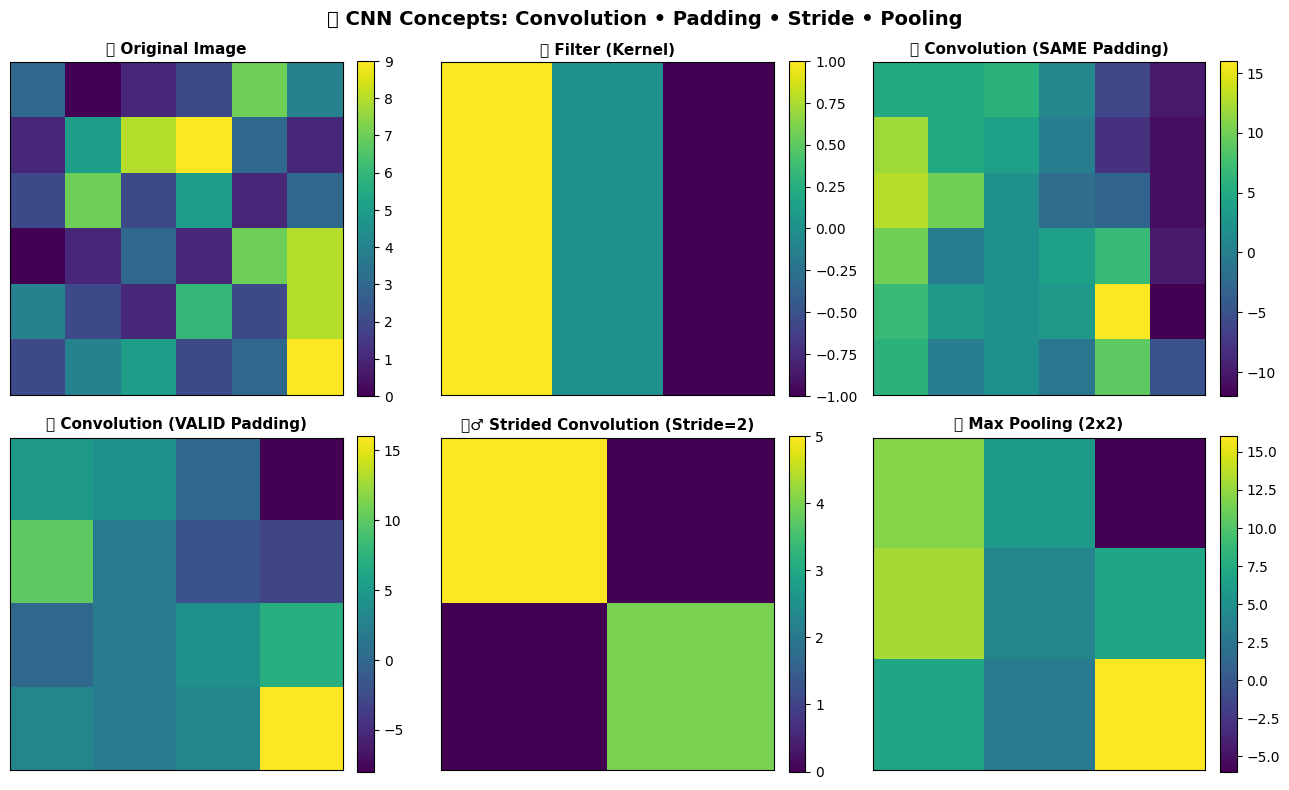

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(13, 8))
axes = axes.ravel()
titles = [
    "🖼️ Original Image",
    "🎯 Filter (Kernel)",
    "🔍 Convolution (SAME Padding)",
    "🚫 Convolution (VALID Padding)",
    "🏃‍♂️ Strided Convolution (Stride=2)",
    "🌊 Max Pooling (2x2)"
]

images = [image, kernel, conv_same, conv_valid, conv_stride, pooled]

for i in range(6):
    im = axes[i].imshow(images[i], cmap='viridis', interpolation='nearest')
    axes[i].set_title(titles[i], fontsize=11, fontweight='bold')
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    fig.colorbar(im, ax=axes[i], fraction=0.046, pad=0.04)

plt.suptitle("🧠 CNN Concepts: Convolution • Padding • Stride • Pooling", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


# Prewitt Filters
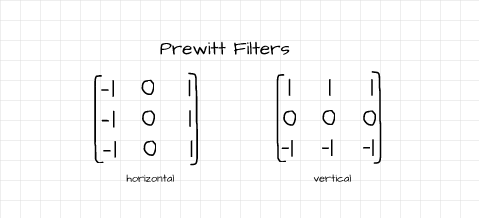 <br> Prewitt **operator is comprised of two filters which help to detect vertical and horizontal edges**. <br> The **horizontal (x-direction) filter helps to detect edges in the image which cut perpendicularly through the horizontal axis** and vise versa for the vertical (y-direction) filter.

In [ ]:
import numpy as np
import torch
import torch.nn.functional as F
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt

In [ ]:
def convolve(image_filepath, filter, title=''):
  image = cv2.imread(image_filepath, cv2.IMREAD_GRAYSCALE)
  filter_size = filter.shape[0]
  convolved = np.zeros(((image.shape[0] - filter_size) + 1,
                      (image.shape[1] - filter_size) + 1))
  for i in tqdm(range(image.shape[0])):
      for j in range(image.shape[1]):
        try:
          convolved[i,j] = (image[i:(i+filter_size),
                                  j:(j+filter_size)] * filter).sum()
        except Exception:
          pass
   #  converting to tensor
  convolved = torch.tensor(convolved)
    #  applying relu activation
  convolved = F.relu(convolved)

    #  producing plots
  figure, axes = plt.subplots(1,2, dpi=120)
  plt.suptitle(title)
  axes[0].imshow(image, cmap='gray')
  axes[0].axis('off')
  axes[0].set_title('original')
  axes[1].imshow(convolved, cmap='gray')
  axes[1].axis('off')
  axes[1].set_title('convolved')
  pass

In [ ]:
horizontal = np.array([
    [-1, 0, 1],
    [ -1,  0,  1],
    [ -1, 0,  1]
])

vertical =np.array([
    [1, 1, 1],
    [ 0,  0,  0],
    [ -1, -1,  -1]
])

100%|██████████| 211/211 [00:00<00:00, 691.40it/s]


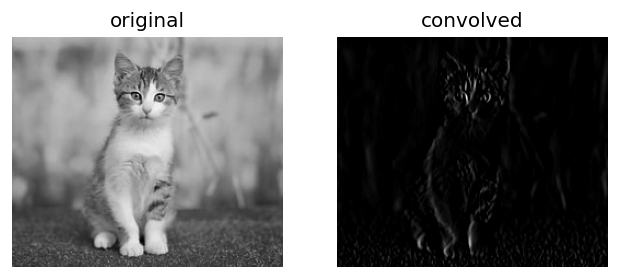

In [ ]:
convolve("/content/OIP.jpeg",horizontal)

100%|██████████| 211/211 [00:00<00:00, 787.32it/s]


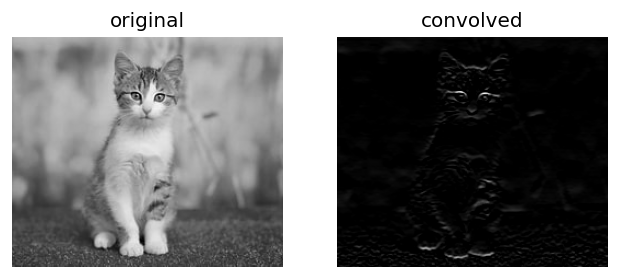

In [ ]:
convolve("/content/OIP.jpeg",vertical)

# Sobel Filters
Sobel operator is **also made up of a vertical and horizontal edge detection** filter. Detected edges are **quite similar to results obtained using Prewitt filters**, but with a distinction of ***higher edge pixel intensity***. In other words, ***edges detected using the Sobel filters are sharper in comparison to Prewitt filters***.

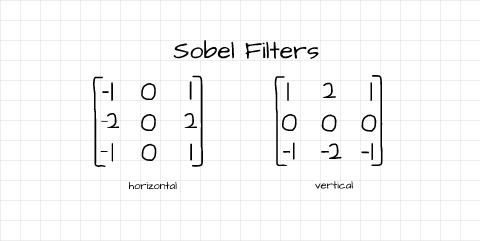

# Laplacian Filter
a single filter ***which detects edges of different orientation***. From a mathematical standpoint, it computes second order derivatives of pixel values unlike the Prewitt and Sobel filters which compute first order derivatives.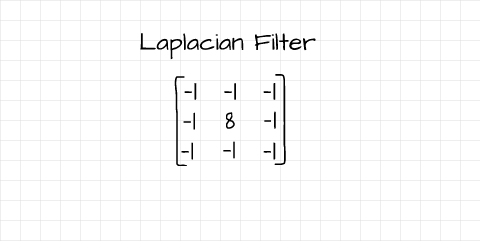

In [ ]:
shorizontal = np.array([
    [-1, 0, 1],
    [ -2,  0,  2],
    [ -1, 0,  1]
])

svertical =np.array([
    [1, 2, 1],
    [ 0,  0,  0],
    [ -1, -2,  -1]
])

100%|██████████| 211/211 [00:00<00:00, 786.73it/s]


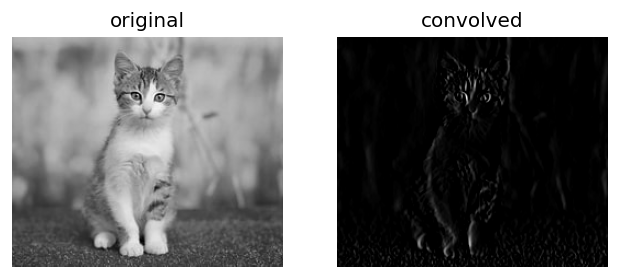

In [ ]:
convolve("/content/OIP.jpeg",shorizontal)

100%|██████████| 211/211 [00:00<00:00, 799.37it/s]


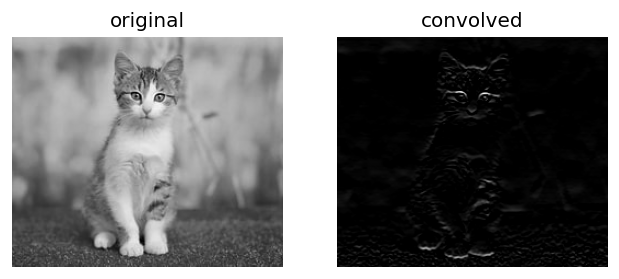

In [ ]:
convolve("/content/OIP.jpeg",svertical)

In [ ]:
laplacian = np.array([
    [-1, -1, -1],
    [ -1,  8,  -1],
    [ -1, -1,  -1]
])

100%|██████████| 211/211 [00:00<00:00, 1239.29it/s]


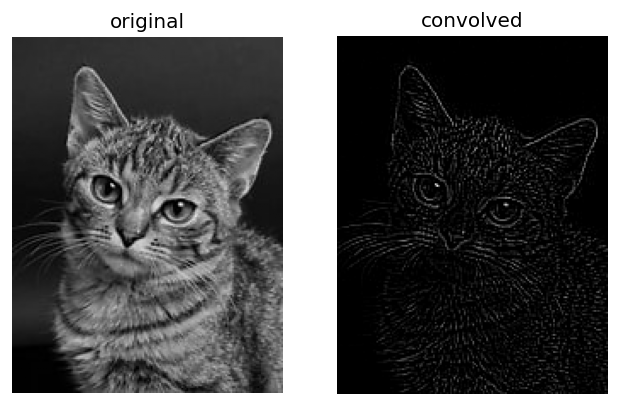

In [ ]:
convolve("/content/OIP (1).jpeg",laplacian)

# Robinson Compass Masks
These filters help to detect edges oriented in those compass directions.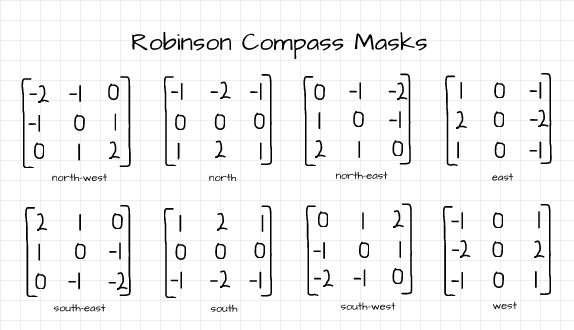

# Krisch Compass Masks
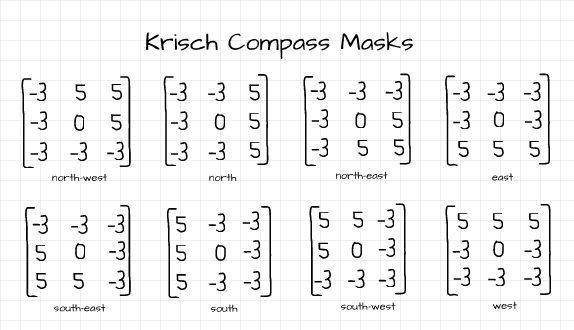

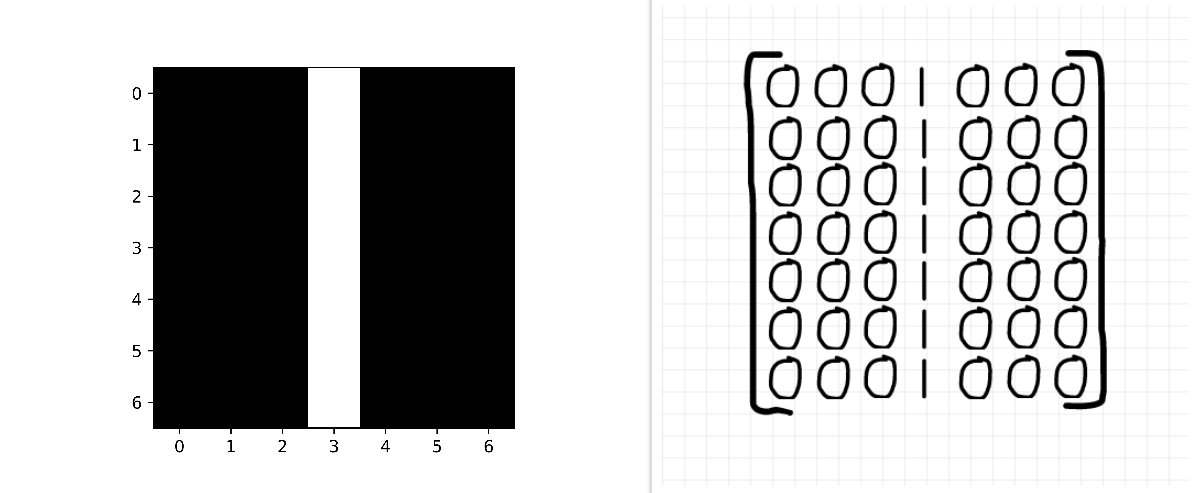 What you see vs. what a computer ‘sees’

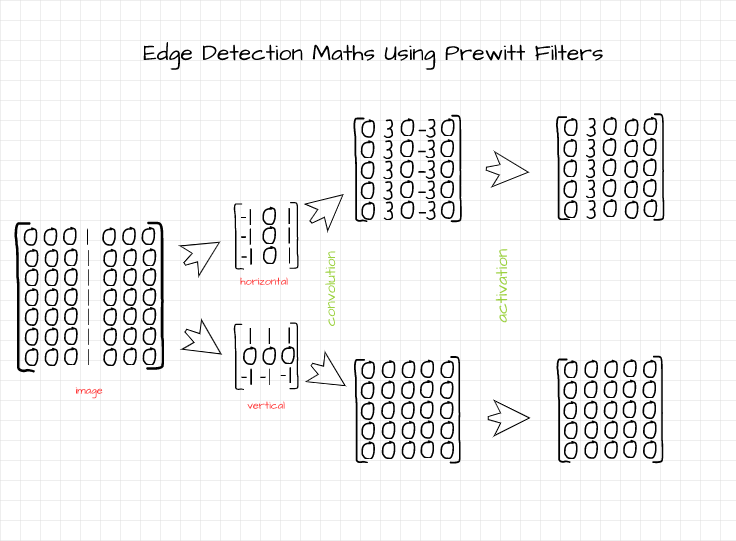

##########################################

# Types of Sequential Data
### **Time Series Data**
* Consists of **observations recorded at specific time intervals**.
* Crucial for tracking changes over time and is widely used in fields such as finance, meteorology, and economics.

### **Text Data**
* Represents sequences of words, characters, or tokens.
* Fundamental to natural language processing (NLP) tasks such as text classification, sentiment analysis, and machine translation.

#Sequential DA for Stock Market

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
ticker = 'AAPL'
data = yf.download(ticker, start='2021-01-01', end='2025-12-10')

/tmp/ipython-input-570311389.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2021-01-01', end='2025-12-10')
[*********************100%***********************]  1 of 1 completed


1. **Date (Index):** The daily timestamp for the data point.

2. **Open:** The stock price at the start of the trading day.

3. **High:** The highest price during the day.

4. **Low:** The lowest price during the day.

5. **Close:** The stock price at the end of the trading day.

6. **Adj Close:** The closing price adjusted for corporate actions (like dividends and splits), which is often the preferred value for time series analysis.

7. **Volume:** The total number of shares traded during the day.

In [ ]:
df = data[['Close']]

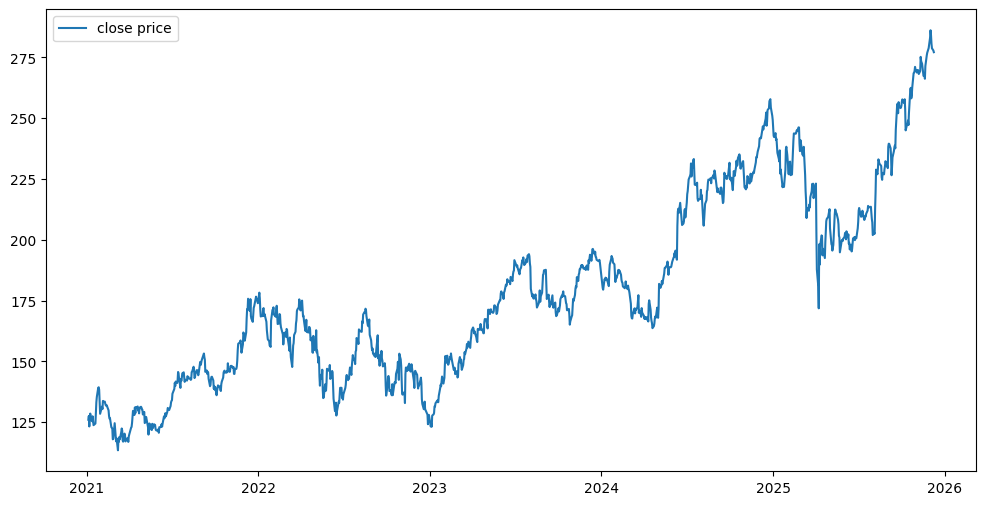

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'],label='close price')
plt.legend()
plt.show()

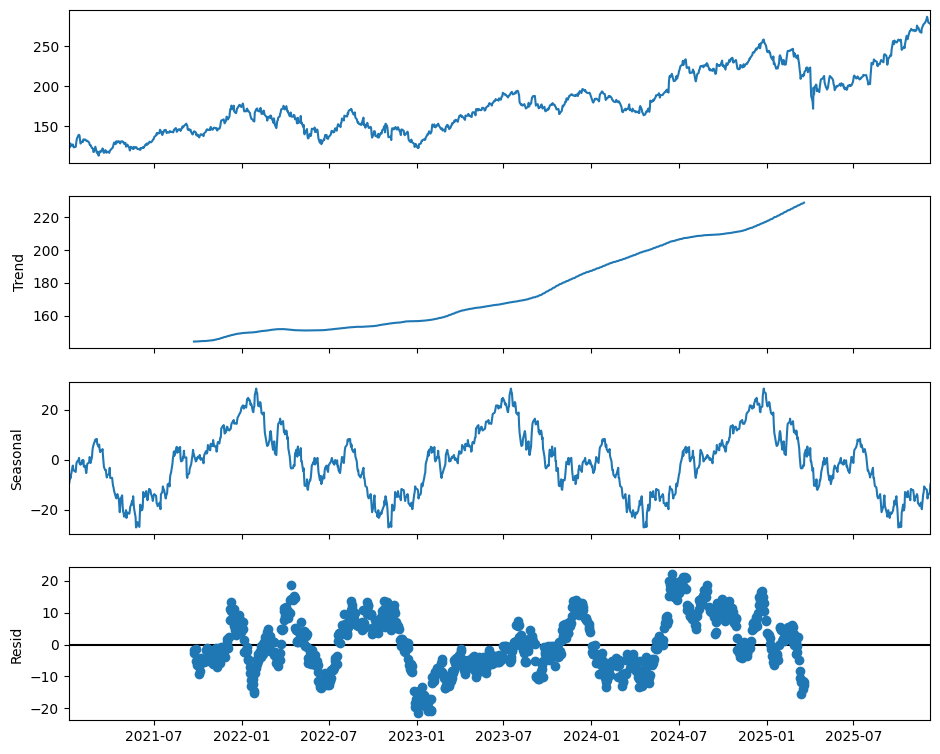

In [ ]:
decomposition = seasonal_decompose(df['Close'], model='additive', period=365)
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.show()

In [ ]:
model = ARIMA(df['Close'].dropna(), order=(5, 1, 1))
# Fit the model
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                 1240
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -3152.135
Date:                Thu, 11 Dec 2025   AIC                           6318.270
Time:                        08:19:07   BIC                           6354.125
Sample:                             0   HQIC                          6331.755
                               - 1240                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7944      0.259      3.061      0.002       0.286       1.303
ar.L2         -0.0216      0.029     -0.748      0.454      -0.078       0.035
ar.L3         -0.0566      0.033     -1.740      0.0

In [ ]:
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
forecast_dates = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, freq='B')[1:]

In [ ]:
forecast_combined = pd.DataFrame({
    'Date': forecast_dates,
    'Forecast': forecast
})

print(forecast_combined)

           Date    Forecast
1240 2025-12-10  277.175217
1241 2025-12-11  277.247948
1242 2025-12-12  277.354485
1243 2025-12-15  277.437652
1244 2025-12-16  277.504868
1245 2025-12-17  277.551480
1246 2025-12-18  277.583024
1247 2025-12-19  277.603262
1248 2025-12-22  277.616044
1249 2025-12-23  277.623891
1250 2025-12-24  277.628633
1251 2025-12-25  277.631445
1252 2025-12-26  277.633089
1253 2025-12-29  277.634036
1254 2025-12-30  277.634574
1255 2025-12-31  277.634876
1256 2026-01-01  277.635042
1257 2026-01-02  277.635133
1258 2026-01-05  277.635181
1259 2026-01-06  277.635207
1260 2026-01-07  277.635220
1261 2026-01-08  277.635227
1262 2026-01-09  277.635230
1263 2026-01-12  277.635231
1264 2026-01-13  277.635232
1265 2026-01-14  277.635232
1266 2026-01-15  277.635232
1267 2026-01-16  277.635232
1268 2026-01-19  277.635232
1269 2026-01-20  277.635232


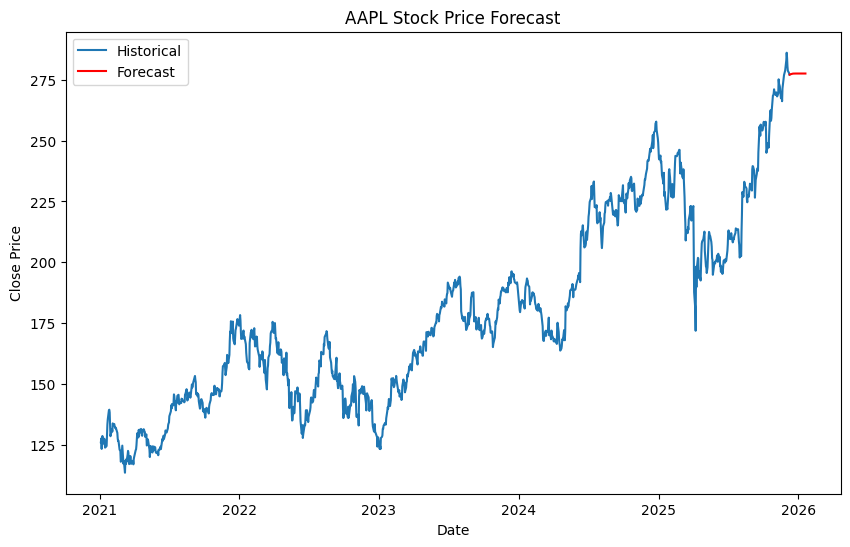

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='Historical')
plt.plot(forecast_combined['Date'], forecast_combined['Forecast'], label='Forecast', color='red')
plt.title(f'{ticker} Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

#Sequential DA for Text


In [ ]:
import nltk

In [ ]:
from nltk.tokenize import word_tokenize, sent_tokenize

In [ ]:
from nltk.corpus import stopwords

In [ ]:
from nltk.probability import FreqDist

In [ ]:
from textblob import TextBlob

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
nltk.download('punkt_tab') #Tokenization model
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [ ]:
nltk.download('maxent_ne_chunker_tab')

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.


True

In [ ]:
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
text = """
Natural Language Processing (NLP) is a field of artificial intelligence
that focuses on the interaction between computers and humans through
natural language. The ultimate objective of NLP is to read, decipher,
understand, and make sense of human languages in a valuable way.
Most NLP techniques rely on machine learning to derive meaning from
human languages.
"""

In [ ]:
word_tokens = word_tokenize(text)
sentence_tokens = sent_tokenize(text)

In [ ]:
word_tokens

['Natural',
 'Language',
 'Processing',
 '(',
 'NLP',
 ')',
 'is',
 'a',
 'field',
 'of',
 'artificial',
 'intelligence',
 'that',
 'focuses',
 'on',
 'the',
 'interaction',
 'between',
 'computers',
 'and',
 'humans',
 'through',
 'natural',
 'language',
 '.',
 'The',
 'ultimate',
 'objective',
 'of',
 'NLP',
 'is',
 'to',
 'read',
 ',',
 'decipher',
 ',',
 'understand',
 ',',
 'and',
 'make',
 'sense',
 'of',
 'human',
 'languages',
 'in',
 'a',
 'valuable',
 'way',
 '.',
 'Most',
 'NLP',
 'techniques',
 'rely',
 'on',
 'machine',
 'learning',
 'to',
 'derive',
 'meaning',
 'from',
 'human',
 'languages',
 '.']

In [ ]:
sentence_tokens

['\nNatural Language Processing (NLP) is a field of artificial intelligence\nthat focuses on the interaction between computers and humans through\nnatural language.',
 'The ultimate objective of NLP is to read, decipher,\nunderstand, and make sense of human languages in a valuable way.',
 'Most NLP techniques rely on machine learning to derive meaning from\nhuman languages.']

In [ ]:
stop_words=set(stopwords.words('english'))

In [ ]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [ ]:
filtered_words=[word for word in word_tokens if word.lower() not in stop_words and word.isalnum()]

In [ ]:
filtered_words

['Natural',
 'Language',
 'Processing',
 'NLP',
 'field',
 'artificial',
 'intelligence',
 'focuses',
 'interaction',
 'computers',
 'humans',
 'natural',
 'language',
 'ultimate',
 'objective',
 'NLP',
 'read',
 'decipher',
 'understand',
 'make',
 'sense',
 'human',
 'languages',
 'valuable',
 'way',
 'NLP',
 'techniques',
 'rely',
 'machine',
 'learning',
 'derive',
 'meaning',
 'human',
 'languages']

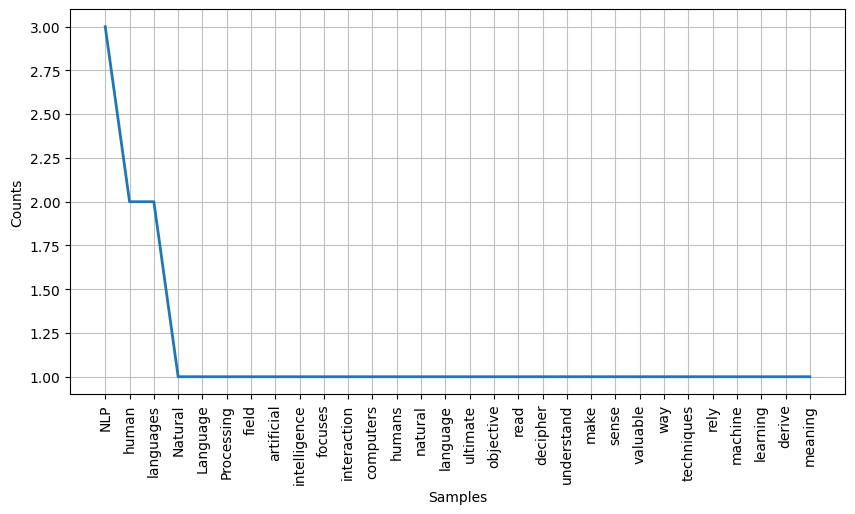

In [ ]:
fdist = FreqDist(filtered_words)

plt.figure(figsize=(10, 5))
fdist.plot(30, cumulative=False)
plt.show()

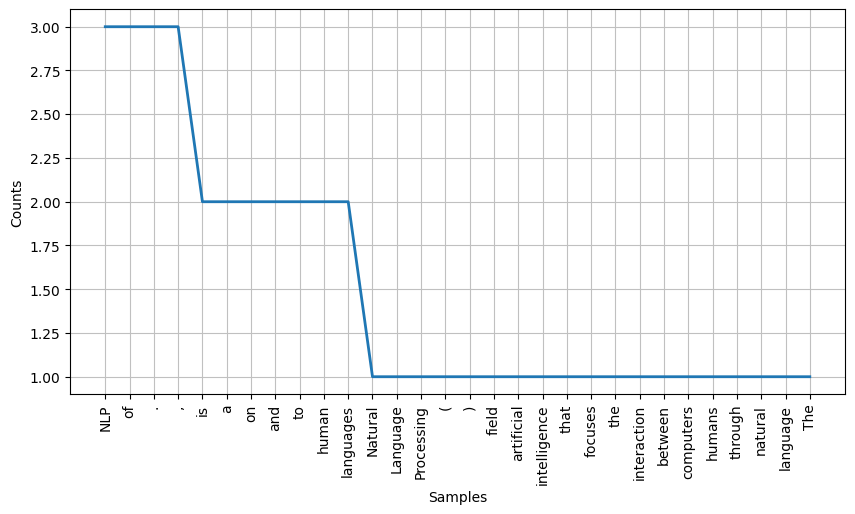

In [ ]:
fdist = FreqDist(word_tokens)

plt.figure(figsize=(10, 5))
fdist.plot(30, cumulative=False)
plt.show()

In [ ]:
text1="""The oppressive atmosphere of the old, unkempt house was palpable the moment I stepped inside; a pervasive damp smell of decay and neglect clung to the stale air. Every creaking floorboard underfoot served as a stark reminder of the building's severe structural disrepair, a constant, unsettling symphony of impending collapse. Filthy, grimy windows effectively blocked out any hopeful sunlight, casting perpetual, dreary shadows across rooms filled with stained, dilapidated furniture. The sheer volume of accumulated dust and cobwebs indicated years of abandonment, a truly dismal environment that offered no solace, only a profound, suffocating sense of despair and regret."""

In [ ]:
blob = TextBlob(text1)
sentiment = blob.sentiment

In [ ]:
sentiment

Sentiment(polarity=-0.1012820512820513, subjectivity=0.6756410256410257)

# 📊 Sentiment Output
The sentiment variable will store a named tuple containing two key floating-point numbers: Polarity and Subjectivity.

### 1. Polarity
**Definition**: Measures the emotional tone of the text, ranging from -1.0 (highly negative) to +1.0 (highly positive).

**Interpretation:** A value near 0 indicates a neutral sentiment.

### 2. Subjectivity
**Definition:** Measures how much of the text is opinion vs. fact, ranging from 0.0 (very objective/factual) to 1.0 (very subjective/personal opinion).

**Interpretation:** A value near 0 means the text is likely reporting facts, while a value near 1 means it contains personal beliefs, feelings, or judgments.

# Recurrent Neural Networks (RNNs)
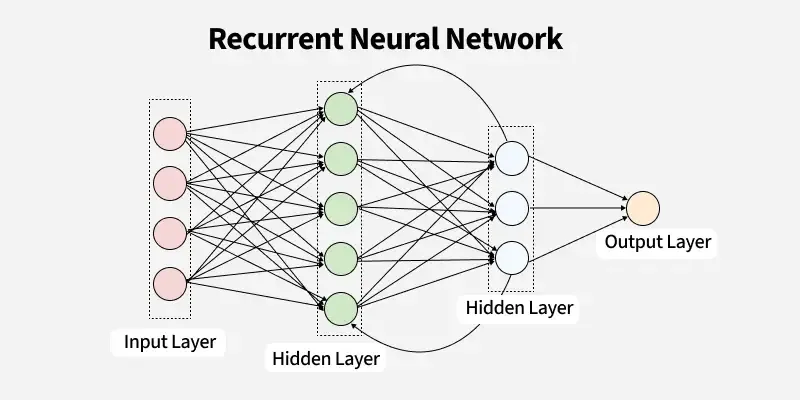

“remembering” past information and passing the output from one step as input to the next i.e it considers all the earlier words to choose the most likely next word. This memory of previous steps helps the network understand context and make better predictions.

###########################################RNN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(0)
x = np.random.randn(5, 3)

In [ ]:
input_size = 3

In [ ]:
hidden_size = 2

In [ ]:
W_xh = np.random.randn(hidden_size, input_size) * 0.5 #Input Weight Matrix

In [ ]:
W_hh = np.random.randn(hidden_size, hidden_size) * 0.5 #Recurrent Weight Matrix

In [ ]:
b_h = np.zeros((hidden_size, 1)) #bias vector for the hidden state

In [ ]:
# Activation function (tanh)
def tanh(x):
    return np.tanh(x)


In [ ]:
# Initial hidden state
h_prev = np.zeros((hidden_size, 1))

# Store hidden states for visualization
hidden_states = [h_prev]

In [ ]:
for t in range(len(x)):
    x_t = x[t].reshape(-1, 1) #Prepares the input
    #Calculates the network's new memory.
    h_t = tanh(np.dot(W_xh, x_t) + np.dot(W_hh, h_prev) + b_h)
    hidden_states.append(h_t)
    h_prev = h_t

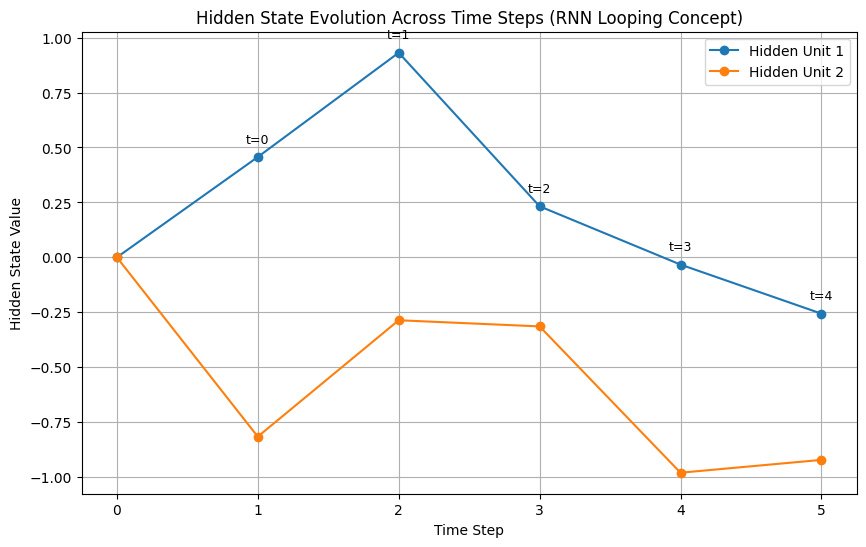

In [ ]:
hidden_states = np.hstack(hidden_states)

# --- Visualization ---
plt.figure(figsize=(10, 6))
plt.plot(hidden_states[0, :], marker='o', label='Hidden Unit 1')
plt.plot(hidden_states[1, :], marker='o', label='Hidden Unit 2')

for t in range(len(x)):
    plt.annotate(f"t={t}", (t+1, hidden_states[0, t+1]),
                 textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)

plt.title("Hidden State Evolution Across Time Steps (RNN Looping Concept)")
plt.xlabel("Time Step")
plt.ylabel("Hidden State Value")
plt.grid(True)
plt.legend()
plt.show()